# Crank-Nicolson (Trapezoid Rule)

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

Reference: Chapter 17 in McClarren.

## Learning Objectives

After studying this notebook, completing the activties, and attending class, you should be able to:
* Implement Crank-Nicolson (Trapezoid Rule) and understand how it is different from Forward/Backward Euler.
* Explain the impact of step size on the accuracy of Crank-Nicolson.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Main Idea

Today, we will discuss techniques to compute approximate solutions to **initial value problems (IVP)**. Every IVP has two parts:
* System of differential equations.
* Initial conditions that specify the numeric value for each different state at $t=0$.

Let's consider the generic, first-order initial value problem given by

$$ y'(t) = f(y,t), \qquad y(0) = y_0,$$

where $f(y,t)$ is a function that in general depends on $y$ and $t$.  Typically, we'll call $t$ the time variable and $y$ our solution.  For a problem of this sort we can simply integrate both sides of the equation from $t=0$ to $t=\Delta t$, where $\Delta t$ is called the time step.  Doing this we get

$$y(\Delta t) - y(0) = \int_{0}^{\Delta t} f(y,t)\,dt.$$

Today's class focuses on solving this problem. You'll notice a lot of similarities to last class, numeric integration, as integrals and differential equations are closely related.

# Crank-Nicolson (aka Trapezoid Rule)

### Main Idea

We could use the trapezoid rule to integrate the ODE over the timestep. Doing this gives

$$y^{n+1} = y^n + \frac{\Delta t}{2}\left( f(y^{n}, t^{n})+ f(y^{n+1}, t^{n+1})\right).$$

This method, often called Crank-Nicolson, is also an <b> implicit method </b> because $y^{n+1}$ is on the right-hand side of the equation. For this method the equation we have to solve at each time step is

$$y^{n+1} - y^n - \frac{\Delta t}{2}\left( f(y^{n}, t^{n})+ f(y^{n+1}, t^{n+1})\right) = 0.$$

Though we saw it before let's remind ourselves of the graphical representation of the trapezoid rule:

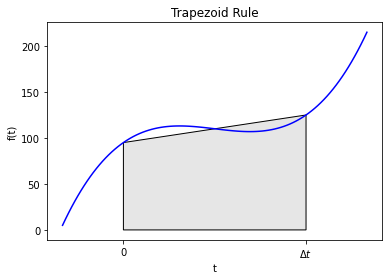

In [2]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(a)), (b,f(b)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Trapezoid Rule")
plt.show()

### Python Implementation

Implementing this method is no more difficult than backward Euler.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Complete the function below. In the commented out spot, you'll need to solve a nonlinear equation to calculate $y^{n+1}$. Hints: You want to write two lines of code. The <b>first line</b> will use a lambda function to define the nonlinear equation to be solved. The <b>second line</b> will call <tt>inexact_newton</tt> to solve the system and store the answer in <tt>y[n]</tt>. <b>Read these instructions again carefully.</b>
</div>

In [3]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    while (np.fabs(f(x)) > epsilon):
        fx = f(x)
        fxdelta = f(x+delta)
        slope = (fxdelta - fx)/delta
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        iterations += 1
    if LOUD:
        print("It took",iterations,"iterations")
    return x #return estimate of root

def crank_nicolson(f,y0,Delta_t,numsteps, LOUD=False):
    """Perform numsteps of the backward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    y = np.zeros(numsteps+1)
    t = np.arange(numsteps+1)*Delta_t
    y[0] = y0
    for n in range(1,numsteps+1):
        if LOUD:
            print("\nt =",t[n])
            
        # Add your solution here
        
        if LOUD:
            print("y =",y[n])
    return t, y

Now let's test our code using the simple problem from above.


t = 0.1
y = 0.9047619048250637

t = 0.2
y = 0.8185941043087901

t = 0.30000000000000004
y = 0.7406327609899468

t = 0.4
y = 0.6700963075158828


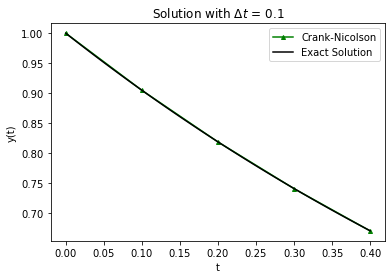

In [4]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = crank_nicolson(RHS,1,Delta_t,t_final/Delta_t,True)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

Your function in the last home activity works if it computes the following values:

| t | y |
| - | - |
| 0.0 | 1.0 |
| 0.1 | 0.9047619048250637 |
| 0.2 | 0.8185941043087901 |
| 0.3 | 0.7406327609899468 |
| 0.4 | 0.6700963075158828 |

In [5]:
# Removed autograder test. You may delete this cell.

### Impact of Step Size on Integration Error

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Run the code below.
</div>

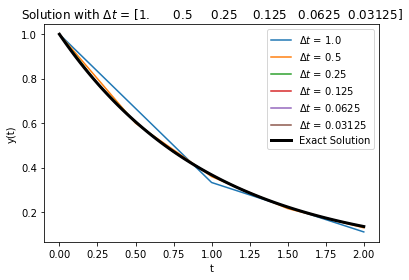

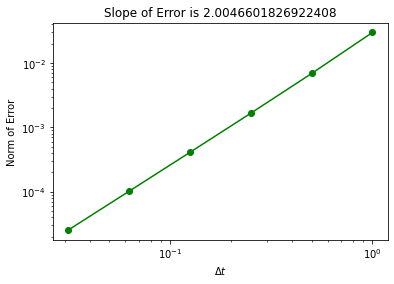

In [6]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = crank_nicolson(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="green")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

Now we get **second-order convergence of the error** as evidenced by the error plot.

### Stability and Oscillations

Let's return to our trusty test problem to explore stability and oscillations with Crank-Nicolson.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Adjust the step size to answer the following questions.
</div>

**Home Activity Questions:**
* At what step size (if any) does Crank-Nicolson become unstable? Why?
* At what step size (if any) does Crank-Nicolson begin to oscillate? Why?

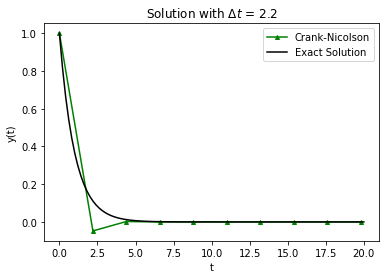

In [7]:
RHS = lambda y,t: -y

# adjust this
Delta_t = 2.2

# compute approximate solution with Crack-Nicolson, plot
t_final = 20
t,y = crank_nicolson(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

In terms of stability, Crank-Nicolson is a mixed bag: it's **stable but can oscillate**.

Notice that the oscillation makes the numerical solution negative. This is the case even though the exact solution, $e^{-t}$, cannot be negative. 